In [1]:
# import TensorFlow library
import tensorflow as tf

In [2]:
# Check the version of TensorFlow
tf.__version__

'2.4.1'

# Loading the MNIST dataset in Keras

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Now we have four categories in our dataset

    1. train_images
    2. train_labels
    3. test_images
    4. test_labels

In [5]:
# First of all we need to check our dataset
train_images.shape

(60000, 28, 28)

it is clear now that we have 60000 samples of `28 x 28` rows and columns

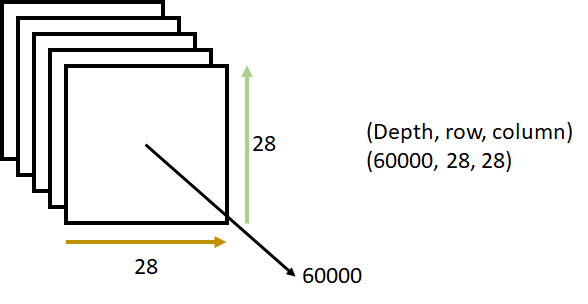

In [6]:
# To check the format of the data stored in train_images
type(train_images)

numpy.ndarray

In [7]:
# To check the ndim of whole train_images
train_images.ndim

3

In [8]:
train_images.size

47040000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
train_labels.size

60000

In [11]:
train_labels[1]

0

In [12]:
# To check the vectorized form of the first image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
# Check the shape of the first image(array)
train_images[0].shape

(28, 28)

In [14]:
# To check the dimensional form of the first image(array)
train_images[0].ndim

2

In [15]:
# now to check the shape of the test_image
test_images.shape

(10000, 28, 28)

In [16]:
test_images[0].ndim

2

In [17]:
# To check the value(label) of the train_labels placed at index [0],
# Note: that we have labels from 0:9
train_labels[0]

5

In [18]:
test_labels[0]

7

# Network Architecture (in TensorFlow)

In [19]:
# importing keras models and layers
from tensorflow.keras import models
from tensorflow.keras import layers

In [20]:
# To make a model variable
# Two models in DL are (Sequential and Functional API)
network = models.Sequential()
# Dense (Every node is fully connected to previous and next layer's nodes)
# input_shape (28*28,[blank mean 01 column]) means that input to the first layers will be of fixed sized row = 28*28 = 784 and 
# activation function converts linearity into non-linearity
# 512 argument is basically used to identify the size of the output layer (512 Neorons)
network.add(layers.Dense(512, activation= 'relu', input_shape = (28 * 28,)))
# Second layer
# Softmax function returns with highest probability
network.add(layers.Dense(10, activation = 'softmax'))

Here one thing to be noticed that `shape(28*28,)` = `(786,)` which is basically a vector (1D) shape of ndarray

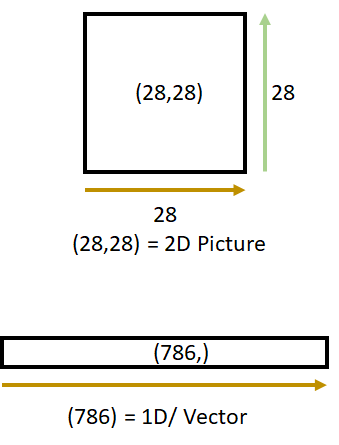

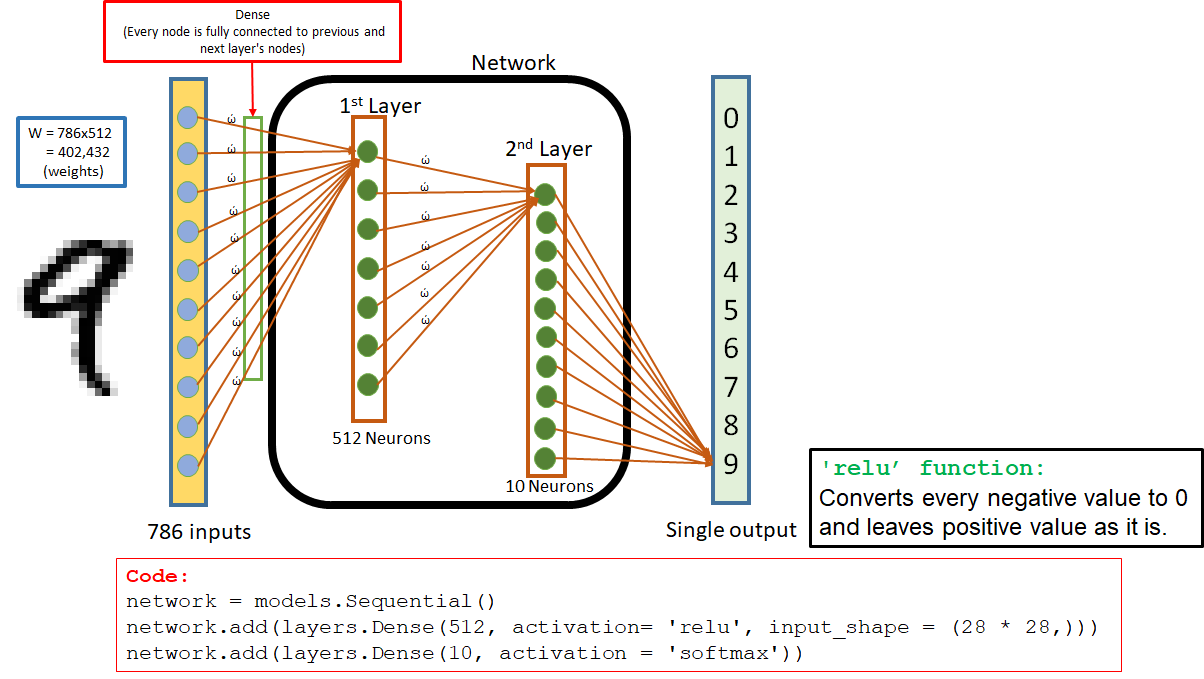

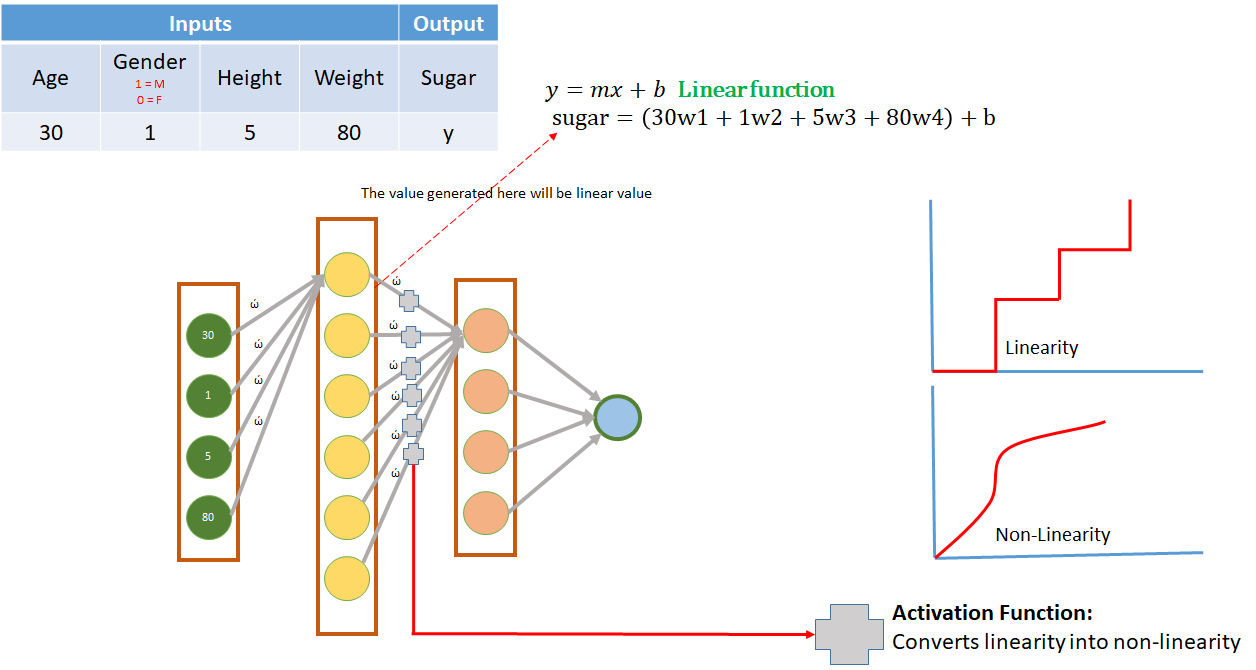

# Compilation Step

In [21]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Preparing the image Data

The picture is basically made up of pixels:

`
    Pixel is made of RGB numbers
    0   --> Black
    255 --> White
`    


In [22]:
# shape of train_images before fitting it to the model
train_images.shape

(60000, 28, 28)

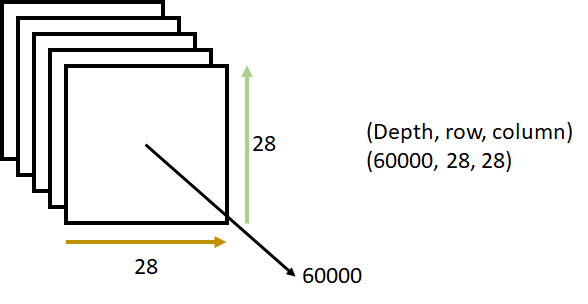

In [23]:
train_images = train_images.reshape((60000, 28*28)) # converting 3 dim array into 2-dim

In [24]:
# after flating the data into a vector form
train_images.shape

(60000, 784)

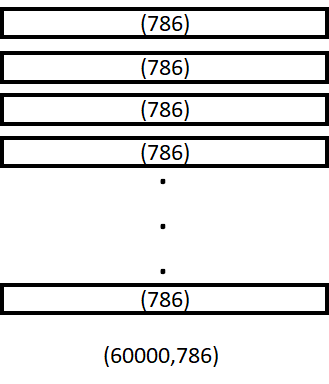

In [25]:
# Following step is taken to bring the data [0 ~ 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

Here we have normalized our data to check now, follow the step below to figure out what have been changed in our image data

In [26]:
train_images[0].shape

(784,)

Now Observe the difference of the shape of the train_images before and after transformation

# Preparing the Labels

In [27]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

* `to_categorical` method is used for one-hot-encoding
* to convert train_labels and test_labels into categorical
* what is one-hot-encoding

          A    B    C
      --------------------
      A   1    0    0  = A
      B   0    1    0  = B
      C   0    0    1  = C

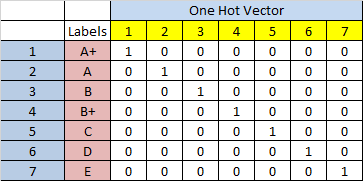

In [28]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [29]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
train_labels[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Train the Model

In [34]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0281 - accuracy: 0.9920
Epoch 2/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0219 - accuracy: 0.9938
Epoch 3/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0172 - accuracy: 0.9951
Epoch 4/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0132 - accuracy: 0.9962
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0097 - accuracy: 0.9974


# Evaluate your Model

In [35]:
test_loss, test_acc = network.evaluate(test_images,test_labels)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0638 - accuracy: 0.9836
test_acc:  0.9836000204086304


Predict by your model

In [36]:
network.predict(test_images)

array([[1.76992518e-11, 2.55350550e-14, 1.77744148e-08, ...,
        9.99997139e-01, 3.17015830e-10, 5.42236922e-09],
       [2.16868454e-14, 4.36710695e-10, 1.00000000e+00, ...,
        2.49189445e-24, 4.69497661e-12, 3.47494254e-24],
       [3.55489561e-11, 9.99727070e-01, 2.24739470e-05, ...,
        1.87855592e-04, 5.99718624e-05, 9.85367610e-09],
       ...,
       [3.17824065e-19, 3.53122783e-12, 1.26079510e-15, ...,
        1.00598925e-08, 1.02885407e-08, 2.02440262e-07],
       [9.24309372e-15, 2.68949091e-17, 4.55081851e-17, ...,
        1.74654724e-13, 2.74507556e-07, 3.38050293e-16],
       [1.54130964e-15, 2.92155810e-22, 4.99537469e-16, ...,
        2.09024974e-19, 5.15275991e-18, 1.33748177e-19]], dtype=float32)

In [37]:
network.predict(test_images)[0]

array([1.7699252e-11, 2.5535055e-14, 1.7774415e-08, 2.7940505e-06,
       5.9504209e-18, 1.4573455e-11, 1.6293435e-19, 9.9999714e-01,
       3.1701583e-10, 5.4223692e-09], dtype=float32)

Now again load your dataset and visualize it, again

In [38]:
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

print(train_images.ndim)

print(train_images.shape)

print(train_images.dtype)

3
(60000, 28, 28)
uint8


# Displaying the fourth digit

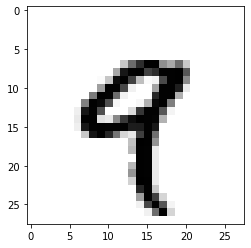

In [39]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

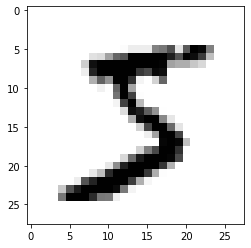

In [40]:
digit = train_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

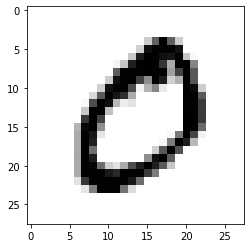

In [41]:
digit = train_images[1]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

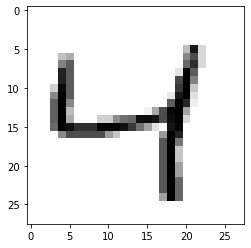

In [42]:
digit = train_images[2]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

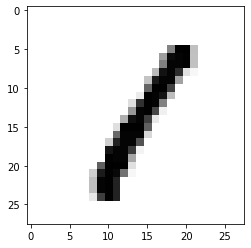

In [43]:
digit = train_images[3]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

Thank You!